In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn

In [5]:
df = pd.read_csv("new_variant_1.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144148 entries, 0 to 144147
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         144148 non-null  int64  
 1   loan_limit                 144148 non-null  int64  
 2   Gender                     144148 non-null  int64  
 3   approv_in_adv              144148 non-null  int64  
 4   loan_type                  144148 non-null  int64  
 5   loan_purpose               144148 non-null  int64  
 6   Credit_Worthiness          144148 non-null  int64  
 7   open_credit                144148 non-null  int64  
 8   business_or_commercial     144148 non-null  int64  
 9   loan_amount                144148 non-null  float64
 10  rate_of_interest           144148 non-null  float64
 11  Interest_rate_spread       144148 non-null  float64
 12  Upfront_charges            144148 non-null  float64
 13  term                       14

# Modelling

## Classification

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Define target and features columns

In [8]:
X = df.drop(columns='Status')
y = df['Status']

#### Train test set split

Для оцінки моделей використовуються наступні метрики:

Accuracy (Точність) - це частка правильних прогнозів серед усіх прикладів. Для збалансованих наборів даних, де класи приблизно рівні за кількістю, точність є хорошим показником. Однак для незбалансованих даних (де один клас переважає), точність може бути неправильною, оскільки модель може правильно передбачати переважний клас і все одно мати високу точність.

Recall (Повнота) - це частка правильно передбачених позитивних прикладів серед усіх реальних позитивних прикладів. У задачах, де важливо мінімізувати пропуск важливих випадків (наприклад, коли потрібно ідентифікувати шахрайство), повнота є ключовою метрикою.

F1-міра - це середнє гармонійне між точністю і повнотою. F1-міра особливо корисна в ситуаціях, де дані є незбалансованими, і потрібно знайти баланс між правильною класифікацією позитивних і негативних класів.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Let's train logistic regression with default parameters

reg_log = LogisticRegression(class_weight='balanced')
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.32      0.62      0.42      7109
         Yes       0.82      0.58      0.68     21721

    accuracy                           0.59     28830
   macro avg       0.57      0.60      0.55     28830
weighted avg       0.70      0.59      0.61     28830



Дана модель, SVC, не використовується у зв'язку із великою кількістю даних та дуже довгим процесом навчання

In [ ]:
# Let's train SVC with default parameters

# svc_classifier = SVC()
# svc_classifier.fit(X_train, y_train)
# y_pred = svc_classifier.predict(X_test)
# print(metrics.classification_report(y_test, y_pred))

In [35]:
# Let's train GaussianNB with default parameters
# За допомогою теореми Байєса розраховуємо апостеріорну ймовірність.

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.70      0.02      0.03      7109
         Yes       0.76      1.00      0.86     21721

    accuracy                           0.76     28830
   macro avg       0.73      0.51      0.45     28830
weighted avg       0.74      0.76      0.66     28830



In [14]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier(weights='distance')
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.26      0.13      0.17      7109
         Yes       0.76      0.88      0.81     21721

    accuracy                           0.69     28830
   macro avg       0.51      0.50      0.49     28830
weighted avg       0.63      0.69      0.65     28830



In [16]:
# Let's train RandomForestClassifier with default parameters

rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      7109
         Yes       1.00      1.00      1.00     21721

    accuracy                           1.00     28830
   macro avg       1.00      1.00      1.00     28830
weighted avg       1.00      1.00      1.00     28830



### Feature importances

In [12]:
X_columns = df.columns.tolist()

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = model.coef_[0]
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X_columns[indices[i]], importances[indices[i]]))


Feature ranking:
1. income (0.067727)
2. Neg_ammortization (0.029638)
3. property_value (0.027224)
4. loan_amount (0.026125)
5. loan_purpose (0.022548)
6. business_or_commercial (0.020550)
7. lump_sum_payment (0.020536)
8. rate_of_interest (0.016615)
9. approv_in_adv (0.008792)
10. occupancy_type (0.008249)
11. interest_only (0.006906)
12. Interest_rate_spread (0.005213)
13. construction_type (0.005116)
14. Security_Type (0.005116)
15. Credit_Score (0.002017)
16. Upfront_charges (0.000380)
17. open_credit (0.000006)
18. ID (0.000001)
19. Secured_by (-0.000236)
20. LTV (-0.000796)
21. term (-0.000806)
22. total_units (-0.002963)
23. Credit_Worthiness (-0.003944)
24. loan_limit (-0.004323)
25. loan_type (-0.014051)
26. Gender (-0.018836)
27. submission_of_application (-0.026829)
28. Region (-0.028326)
29. age (-0.029380)
30. co-applicant_credit_type (-0.038127)
31. credit_type (-0.067704)


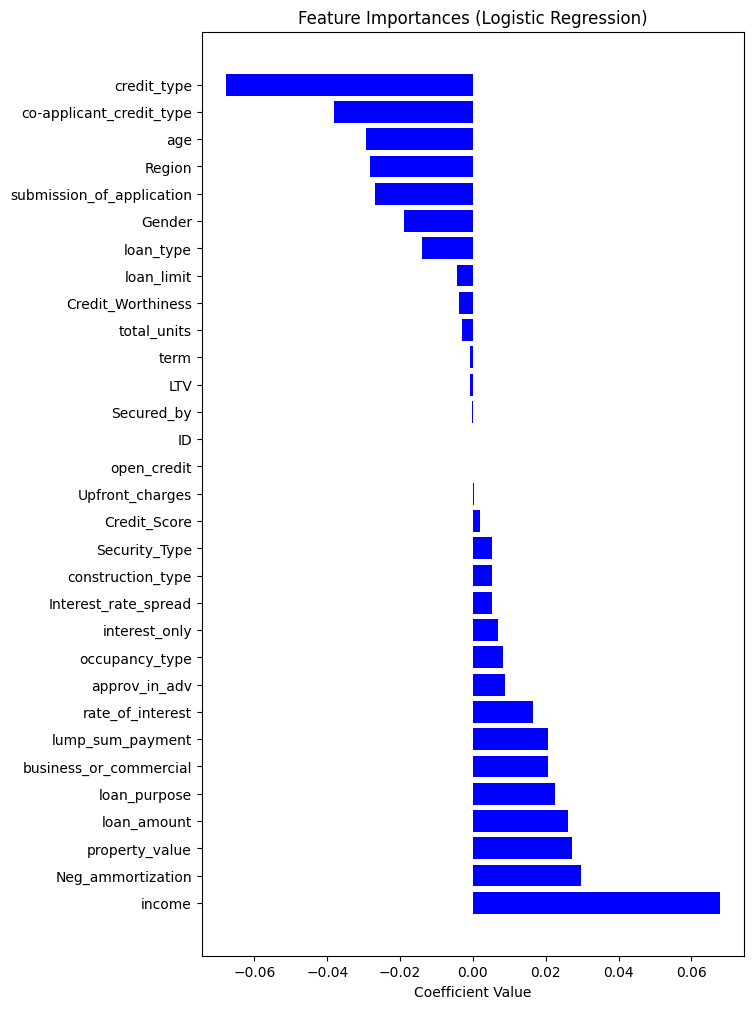

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Навчання моделі логістичної регресії
model = LogisticRegression()
model.fit(X_train, y_train)

# Отримання коефіцієнтів
importances = model.coef_[0]
indices = np.argsort(importances)[::-1]

# Побудова графіку важливості ознак
plt.figure(figsize=(7, 12))
plt.title('Feature Importances (Logistic Regression)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()